# Final Project: Santander Customer Satisfaction

## Name: Rafael Villalobos

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The 'TARGET' column is the variable to predict. It equals 1 for unsatisfied and 0 for satisfied customers

# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Training set shape: (76020, 371)
Test set shape: (75818, 370)

Data types in the training set:
ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

Basic statistics for the training set:
                  ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.0

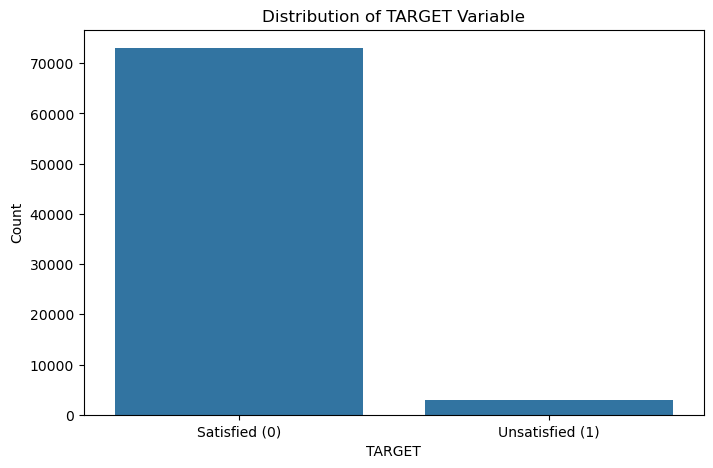

In [31]:
# Check the size of the datasets
print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

# Check the data types of each column
print("\nData types in the training set:")
print(train.dtypes)

# Basic statistics to understand the features
print("\nBasic statistics for the training set:")
print(train.describe())

# Check the distribution of TARGET variable
target_counts = train['TARGET'].value_counts()
print(target_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.title('Distribution of TARGET Variable')
plt.xticks([0, 1], ['Satisfied (0)', 'Unsatisfied (1)'])
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Fit the pipeline to your data
X = train.drop(columns='TARGET')
y = train['TARGET']

X_test = test

# Define the pipeline with preprocessing steps and a model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X, y)

y_test_predict = pipeline.predict(X_test)

predictions_df = pd.DataFrame({'Customer_ID': test.index, 'TARGET_Prediction': y_test_predict})

# Display the first few rows of predictions
predictions_df.head()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the trained model
feature_importances = pipeline.named_steps['classifier'].feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 8))
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(len(features)), feature_importances[indices], align='center')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlim(-1, 50)  # Only show x values
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()
